# A Data Engineering Starter Kit 

In this notebook, we will explore the fundamentals of using a lakehouse and Apache Spark for data storage and analysis. We will showcase the process of accessing data from the lakehouse, analyzing it with Spark DataFrames, executing elementary data transformations, and preparing the data for machine learning models. Upon completion of this guide, you will possess a solid comprehension of utilizing a lakehouse for data storage and analysis, as well as be adept at executing routine data engineering tasks using Spark. Let's begin!


## Loads parquet data into a Spark DataFrame

A default lakehouse containing sample data has been set up for you. Let's proceed to utilize it.

In [4]:
df = spark.read.parquet("abfss://MicrosoftLearn@onelake.dfs.fabric.microsoft.com/MicrosoftLearn_LH.Lakehouse/Files/green_tripdata_2022-09.parquet") 

# df now is a Spark DataFrame containing parquet data from "Files/green_tripdata_2022-08.parquet".
display(df)

StatementMeta(, 5123cc88-6e44-461e-a767-a13aca6d2032, 6, Finished, Available)

SynapseWidget(Synapse.DataFrame, a37742f1-789a-40c3-9679-e4bbf8604974)

This code loads parquet data into a Spark DataFrame named `df`. The data is loaded from the file path `Files/green_tripdata_2022-08.parquet`. The `display()` function is then used to show the contents of the DataFrame in a tabular format.

Parquet and Delta are two file formats that can be used to store and manage large datasets in big data environments. Parquet is a columnar storage format that is optimized for reading large data sets efficiently. It achieves this by storing related columns of data together, which allows for more efficient data retrieval when querying the data. Parquet is particularly well-suited for use cases that involve querying large amounts of data, such as data warehousing and business intelligence. The read function of the spark object is used to read the parquet data into a DataFrame. Once the data is loaded into the DataFrame, it can be used for various data analysis and processing tasks. The `display()` function is a built-in function that displays the contents of a DataFrame in a tabular format.

Delta, on the other hand, is a file format that is designed for managing large-scale datasets in distributed environments. Delta is built on top of Parquet, but it also includes additional features that are specifically designed to support transactional processing and other data management tasks. These features include support for ACID transactions, automatic file and partition management, and the ability to merge data updates and deletes.


In [1]:
# Specify the name of the Delta table
#table_name = 'green_tripdata_2022_08' 

# Write the DataFrame to a Delta Lake table, using the specified name and path
#df.write.format('delta').mode('overwrite').saveAsTable(table_name)

StatementMeta(, 7592ae84-24bb-46a6-9277-ce17ade592ec, 3, Finished, Available)

The code snippet above demonstrates how to write a Spark DataFrame to a Delta Lake table. Delta Lake provides a layer of reliability and performance enhancements on top of raw data in Parquet format. Compared to raw Parquet files, Delta Lake tables allow for easy versioning, schema evolution, and transactional writes, which is beneficial for scenarios where data is constantly changing and updating. The write function saves the DataFrame as a Delta Lake table, where table_name represents the name of the Delta Lake table, and delta_path represents the file path to store the Delta Lake table. The mode function is used to specify the write mode. In this case, it is set to overwrite, which replaces any existing Delta Lake table with the same name. The format function specifies the format in which the data is written, which in this case is set to Delta Lake format.

![image-alt-text](https://bnz06pap003files.storage.live.com/y4msD-h3yeUMDWcsS0ssGpNf9nH7qiI6ecTWj1bw4c9aHtQ2Lyyb-gW2UglZb-33yCjhdM_wrW8oJgx4j_8Rf3LSzDWSuVM1e_2RF_oJ3Zh9O90SXcXLHyxQaXUsOYpLB1uPPbCx8u3tF0l0ryopQQ423WZp271kjZfDUqrml09BJDIn5rMXPZDDFoWIih_SYcx?width=640&height=446&cropmode=none)

Alternatively, the Lakehouse explorer page also provides an integrated experience to load csv and parquet files as a Delta table, without requiring any Spark experience. This feature increases productivity by enabling you to load tables with simple right-click actions.

![image-alt-text](https://bnz06pap003files.storage.live.com/y4mnDefmX2eJECXaZzjq4LkTop7ymEi9PKz6Sm4iy0uuuZqiqHffbKjtgsG5F8fQ1_U-48_moDfRFK9hFCATuyBlvN9ZQ3U_Xsby6jxRiZjd_lDx9O4s4GLJUxydZaX-K3vNUcJa-MiYp6Ehr3u_isN0VnaT7cMvbilJP4PBTrOXc4LBOuDjSDQyT0wMEfBdPKl?width=2190&height=903&cropmode=none)

In [5]:
#df = spark.sql("SELECT * FROM green_tripdata_2022_09 LIMIT 1000") 

#display(df)

StatementMeta(, 5123cc88-6e44-461e-a767-a13aca6d2032, 7, Finished, Available)

This code creates a Spark DataFrame by querying the Delta Lake table `green_tripdata_2022_08` from the `sample_lakehouse` database. The `LIMIT` clause limits the number of rows returned to 1000. The resulting DataFrame is then displayed using the display function, which is a specific function that provides a convenient way to visualize and explore data. 

In [6]:
df.printSchema()

StatementMeta(, 5123cc88-6e44-461e-a767-a13aca6d2032, 8, Finished, Available)

root
 |-- VendorID: long (nullable = true)
 |-- lpep_pickup_datetime: timestamp_ntz (nullable = true)
 |-- lpep_dropoff_datetime: timestamp_ntz (nullable = true)
 |-- store_and_fwd_flag: string (nullable = true)
 |-- RatecodeID: double (nullable = true)
 |-- PULocationID: long (nullable = true)
 |-- DOLocationID: long (nullable = true)
 |-- passenger_count: double (nullable = true)
 |-- trip_distance: double (nullable = true)
 |-- fare_amount: double (nullable = true)
 |-- extra: double (nullable = true)
 |-- mta_tax: double (nullable = true)
 |-- tip_amount: double (nullable = true)
 |-- tolls_amount: double (nullable = true)
 |-- ehail_fee: integer (nullable = true)
 |-- improvement_surcharge: double (nullable = true)
 |-- total_amount: double (nullable = true)
 |-- payment_type: double (nullable = true)
 |-- trip_type: double (nullable = true)
 |-- congestion_surcharge: double (nullable = true)



The code `df.printSchema()` prints out the schema of a Spark DataFrame `df`. The schema defines the structure of the data in the DataFrame, including the name of each column, the data type of each column, and whether null values are allowed.

The output of `df.printSchema()` displays the name of each column in the DataFrame, the data type of each column, and whether null values are allowed. This information can be useful for understanding the structure of the data in the DataFrame, and for performing operations on the data.

Another low-code integrated experience you can leverage is table schema. You can quickly view table columns and data types by opening the chevron beside any table node.

![image-alt-text](https://bnz06pap003files.storage.live.com/y4moGbjtacRSDzkoaVGDBmvHgkxHN2_VLxEMVg72kewIUu6JzYl-KvtwijLh-rnGmWLGEJZSwYUYxw4Zt8VMGQFZy2wS078vDVlZXfTzOHR9lwBE01d-QnCxVhlMsCs_reyR1bnezTX7GGx9qV_CLd8J0MzEXirMTdzzGd3Uq6NofWoPfoVMd9TW9Iuvtf0c4Xa?width=418&height=861&cropmode=none)

In [7]:
df.show(5)

StatementMeta(, 5123cc88-6e44-461e-a767-a13aca6d2032, 9, Finished, Available)

+--------+--------------------+---------------------+------------------+----------+------------+------------+---------------+-------------+-----------+-----+-------+----------+------------+---------+---------------------+------------+------------+---------+--------------------+
|VendorID|lpep_pickup_datetime|lpep_dropoff_datetime|store_and_fwd_flag|RatecodeID|PULocationID|DOLocationID|passenger_count|trip_distance|fare_amount|extra|mta_tax|tip_amount|tolls_amount|ehail_fee|improvement_surcharge|total_amount|payment_type|trip_type|congestion_surcharge|
+--------+--------------------+---------------------+------------------+----------+------------+------------+---------------+-------------+-----------+-----+-------+----------+------------+---------+---------------------+------------+------------+---------+--------------------+
|       2| 2022-09-01 00:45:23|  2022-09-01 00:52:39|                 N|       1.0|          74|          42|            1.0|         1.51|        7.5|  0.5|    0.

The code `df.show(5)` is used to display the first five rows of a DataFrame called `df`. This is a useful function when working with large datasets to quickly inspect the data and ensure that it has been loaded correctly. The number inside the parenthesis specifies the number of rows to display. In this case, the function call displays the first five rows of the DataFrame `df`. Each row is displayed as a separate line and the columns are separated by vertical bars.

When working with data, one of the initial tasks is to read it into the environment for analysis. Once the data is loaded, basic analysis such as filtering, sorting, and aggregating can be performed. However, as the scale and complexity of the data increase, there is a need for more advanced data engineering scenarios such as data cleansing, transformation, and aggregation. 

**Congratulations on completing the first part of the sample. Let us now move on to custom scenarios.**

# Scenario 1: Data cleaning and transformation

In this scenario, the data engineer could perform some data cleaning and transformation tasks to prepare the data for downstream analysis. For example, they could remove any invalid or missing data, convert the data types of some columns, and add some new calculated columns based on the existing data. This could involve using Spark SQL queries, user-defined functions (UDFs), or built-in Spark functions to manipulate the data.

Objective: **Cleanse the data and filter out invalid records for further analysis.**


In [1]:
from pyspark.sql.functions import col, when

# Load data from source
df = spark.read.load("Tables/green_tripdata_2022_08", header=True, inferSchema=True)
df_count = df.count()

# Remove invalid records
df = df.filter((col("trip_distance") > 0) & (col("fare_amount") > 0))
df_count_after_clearning = df.count()

number_of_deleted_records = df_count - df_count_after_clearning

print(f"Removed {number_of_deleted_records} records")

# # Cleanse data
df = df.withColumn("store_and_fwd_flag", when(col("store_and_fwd_flag") == "Y", True).otherwise(False))
df = df.withColumn("lpep_pickup_datetime", col("lpep_pickup_datetime").cast("timestamp"))
df = df.withColumn("lpep_dropoff_datetime", col("lpep_dropoff_datetime").cast("timestamp"))

# Display cleansed data to destination
display(df)

# Write cleansed data to destination
df.write.format("delta").mode("overwrite").saveAsTable("green_tripdata_2022_08_cleansed")

StatementMeta(, , , Cancelled, )

In this scenario, we aim to demonstrate how data engineers can perform data cleansing and filtering on a large dataset. We begin by loading the data from the source and then filter out records where the trip distance and fare amount are less than or equal to zero, which are invalid records.

Next, we cleanse the data by converting the `store_and_fwd_flag` column to a boolean type, and converting the `lpep_pickup_datetime` and `lpep_dropoff_datetime` columns to timestamp types. Finally, we write the cleansed data to the destination in the parquet format.

This scenario demonstrates the importance of data cleansing and filtering to ensure the data is accurate and valid before proceeding with further analysis.

# Scenario 2: Exploratory data analysis (EDA)

Exploratory data analysis (EDA) is a common scenario for data engineers. EDA is the process of analyzing and understanding data to gain insights, identify patterns, and develop hypotheses for further investigation. In data engineering, EDA is often done to identify data quality issues, anomalies, or other problems that need to be addressed before data can be used for analysis or modeling. EDA can also help data engineers to understand the relationships between different data sources and determine the best way to join or transform them.

In [15]:
# Load data from source
df = spark.read.load("Tables/green_tripdata_2022_08_cleansed", header=True, inferSchema=True)

# Count the number of rows 
df.count()

StatementMeta(, dc01a2f9-fb06-49c5-b113-5a2a2e6f5f8f, 17, Finished, Available)

1000

`df.count()` is a Spark DataFrame API function that returns the number of rows in the DataFrame. It is a convenient way to quickly determine the size of the DataFrame without having to iterate over all the rows manually. The function is an action in Spark, meaning it triggers a computation that counts the number of rows in the DataFrame and returns the result. It is useful for getting a quick overview of the data size and checking if any rows are missing or dropped during data processing. However, it should be used with caution on large datasets, as it can be a costly operation that requires significant computational resources.

In [16]:
# Display the data types of the columns.

df.dtypes

StatementMeta(, dc01a2f9-fb06-49c5-b113-5a2a2e6f5f8f, 18, Finished, Available)

[('VendorID', 'bigint'),
 ('lpep_pickup_datetime', 'timestamp'),
 ('lpep_dropoff_datetime', 'timestamp'),
 ('store_and_fwd_flag', 'string'),
 ('RatecodeID', 'double'),
 ('PULocationID', 'bigint'),
 ('DOLocationID', 'bigint'),
 ('passenger_count', 'double'),
 ('trip_distance', 'double'),
 ('fare_amount', 'double'),
 ('extra', 'double'),
 ('mta_tax', 'double'),
 ('tip_amount', 'double'),
 ('tolls_amount', 'double'),
 ('ehail_fee', 'int'),
 ('improvement_surcharge', 'double'),
 ('total_amount', 'double'),
 ('payment_type', 'double'),
 ('trip_type', 'double'),
 ('congestion_surcharge', 'double')]

`df.dtypes` is an attribute of a DataFrame object that returns a list of tuples containing the column names and their corresponding data types. The data types are represented using the Spark SQL DataType class, which is a set of classes for representing data types in Spark SQL.

In [10]:
# Group the data by 'VendorID' and count the number of rows in each group. 

from pyspark.sql.functions import col

df.groupBy(col("vendorID")).count().show()

StatementMeta(, dc01a2f9-fb06-49c5-b113-5a2a2e6f5f8f, 12, Finished, Available)

+--------+-----+
|vendorID|count|
+--------+-----+
|       2|  792|
|       1|  208|
+--------+-----+



The code imports the col function from pyspark.sql.functions and uses it to select the `"vendorID"` column from the Spark DataFrame df. The `groupBy()` function is then called on the resulting column object to group the DataFrame by the distinct values in the `"vendorID"` column. The `count()` function is then applied to the resulting grouped DataFrame to calculate the number of records in each group. Finally, the `show()` function is used to display the resulting DataFrame on the console.

In [12]:
# Retrieve information about the earliest and latest pickup dates in the dataset.

from pyspark.sql.functions import min, max

oldest_day = df.select(min("lpep_pickup_datetime")).collect()[0][0]
latest_day = df.select(max("lpep_pickup_datetime")).collect()[0][0]

print("Oldest pickup date: ", oldest_day)
print("Latest pickup date: ", latest_day)

StatementMeta(, dc01a2f9-fb06-49c5-b113-5a2a2e6f5f8f, 14, Finished, Available)

Oldest pickup date:  2022-07-31 23:27:29
Latest pickup date:  2022-08-05 01:23:39


The code reads the Spark DataFrame `df` which contains information about NYC taxi trips. The code uses the `min` and `max` functions from PySpark to select the earliest and latest pickup dates respectively. These dates are stored in the variables `oldest_day` and `latest_day`. The 'collect' function is then used to retrieve these values and they are printed to the console using the `print` function. The output displays the earliest and latest pickup dates in the dataset.

In [14]:
from pyspark.sql.functions import date_format

# group by year, month and day of lpepPickupDatetime
df_grouped = df.groupby(date_format('lpep_pickup_datetime', 'yyyy-MM-dd').alias('pickup_date')).count()

# show the result
df_grouped.show()

StatementMeta(, dc01a2f9-fb06-49c5-b113-5a2a2e6f5f8f, 16, Finished, Available)

+-----------+-----+
|pickup_date|count|
+-----------+-----+
| 2022-08-01|  997|
| 2022-07-31|    1|
| 2022-08-04|    1|
| 2022-08-05|    1|
+-----------+-----+



This code uses the PySpark `date_format` function to group the df DataFrame by the year, month, and day of the lpep_pickup_datetime column, and then counts the number of occurrences for each date.

`date_format` is a PySpark SQL function used to format the date or timestamp column to the specified format. In this code, the format used is yyyy-MM-dd. The alias `pickup_date` is assigned to the formatted date column, and the DataFrame is grouped by this column using the `groupby()` method. The `count()` method is then applied to count the number of occurrences of each `pickup_date`. Finally, the result is displayed using the `show()` method.

In [17]:
# min max values of target feature "fare_amount"

df.select(min('fare_amount').alias('min'), max('fare_amount').alias('max')).show()

StatementMeta(, dc01a2f9-fb06-49c5-b113-5a2a2e6f5f8f, 19, Finished, Available)

+----+-----+
| min|  max|
+----+-----+
|-2.5|300.0|
+----+-----+



This code computes the minimum and maximum values of the `fare_amount` column in the Spark DataFrame `df`. It uses the `min()` and `max()` functions from the pyspark.sql.functions module to compute the minimum and maximum values, respectively. The `alias()` method is used to rename the resulting columns as `"min"` and `"max"`. Finally, the `show()` method is used to display the resulting DataFrame with two columns `"min"` and `"max"`, showing the minimum and maximum values of the `fare_amount` column.

In [20]:
# General statistical characteristics of fare amount

df.select('fare_amount').describe().toPandas()

StatementMeta(, dc01a2f9-fb06-49c5-b113-5a2a2e6f5f8f, 22, Finished, Available)

,summary,fare_amount
0,count,1000
1,mean,14.870280000000015
2,stddev,15.371469324394166
3,min,-2.5
4,max,300.0


This code is performing descriptive statistical analysis on the `"fare_amount"` column of a Spark DataFrame named `"df"`. Specifically, it is using the `describe()` method of the DataFrame to compute summary statistics including count, mean, standard deviation, minimum, and maximum.

The result of `describe()` is then converted to a Pandas DataFrame using the `toPandas()` method. This allows the statistics to be displayed in a more user-friendly table format, which includes the same summary statistics along with the 25th, 50th, and 75th percentiles. The resulting table provides insights into the central tendency and dispersion of the `"fare_amount"` variable, and can be useful for understanding the distribution of the data and identifying potential outliers.

In [21]:
# quantiles

df.select('fare_amount').approxQuantile("fare_amount",[0.1, 0.25, 0.5, 0.75, 0.9], 0.01)

StatementMeta(, dc01a2f9-fb06-49c5-b113-5a2a2e6f5f8f, 23, Finished, Available)

[5.5, 7.5, 11.0, 17.5, 26.0]

This code computes the approximate quantiles of the `fare_amount` column of the DataFrame `df` using the `approxQuantile` function from PySpark's SQL functions module. The function takes three arguments - the name of the column for which quantiles are to be computed, the list of quantile values to be returned, and a relative error value. In this case, the quantiles are 0.1, 0.25, 0.5, 0.75, and 0.9, and the relative error is set to 0.01. The function returns an array of approximate quantile values for the given column and quantile values.

StatementMeta(, dc01a2f9-fb06-49c5-b113-5a2a2e6f5f8f, 25, Finished, Available)

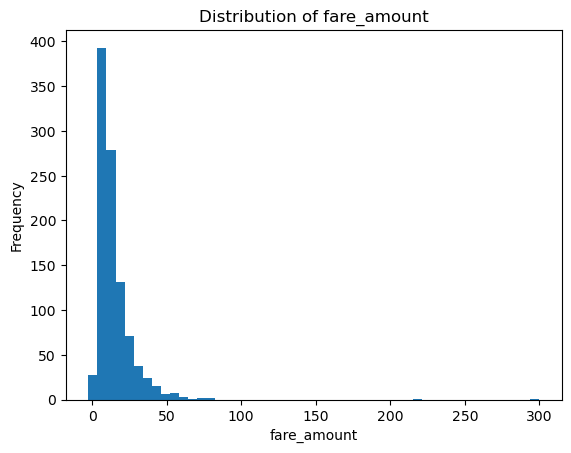

In [23]:
import matplotlib.pyplot as plt
import pyspark.sql.functions as F

# Assuming your DataFrame is named `df`
fare_distribution = df.select(F.col('fare_amount')).toPandas()

# Plot histogram
plt.hist(fare_distribution, bins=50)
plt.title('Distribution of fare_amount')
plt.xlabel('fare_amount')
plt.ylabel('Frequency')
plt.show()

This code is used to plot the distribution of fare_amount using matplotlib library in Python. The fare_amount data is first extracted from the Spark DataFrame using the select function along with the `F.col()` function to extract the fare_amount column. The resulting DataFrame is then converted to a Pandas DataFrame using the `toPandas()` function. The fare_amount data is then plotted as a histogram using the `hist()` function from matplotlib. The number of bins for the histogram is set to 50 using the bins parameter. Finally, the title and axis labels for the plot are set using the `title()`, `xlabel()`, and `ylabel()` functions, and the plot is displayed using the `show()` function.

StatementMeta(, dc01a2f9-fb06-49c5-b113-5a2a2e6f5f8f, 26, Finished, Available)

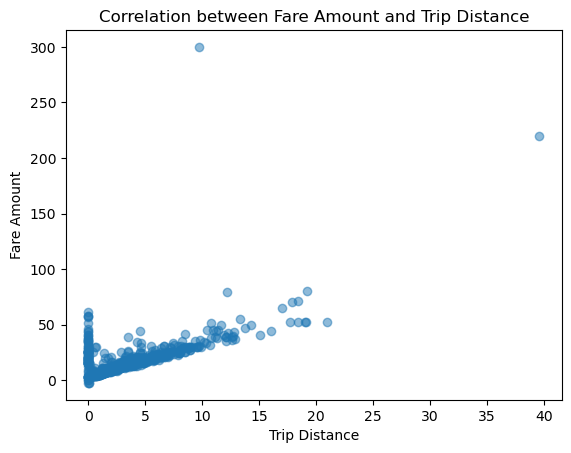

In [24]:
import matplotlib.pyplot as plt

# assuming `df` is your Spark DataFrame containing the columns `fare_amount` and `trip_distance`

# convert Spark DataFrame to Pandas DataFrame
df_pd = df.select(['fare_amount', 'trip_distance']).toPandas()

# create scatter plot
fig, ax = plt.subplots()
ax.scatter(x=df_pd['trip_distance'], y=df_pd['fare_amount'], alpha=0.5)

# set axis labels and title
ax.set_xlabel('Trip Distance')
ax.set_ylabel('Fare Amount')
ax.set_title('Correlation between Fare Amount and Trip Distance')

# show the plot
plt.show()


This code snippet demonstrates how to create a scatter plot using Matplotlib in Python. The code assumes that the Spark DataFrame df contains the columns fare_amount and trip_distance. First, the Spark DataFrame is converted to a Pandas DataFrame using the `toPandas()` function. Then, a scatter plot is created using `ax.scatter()` function. The x and y arguments of the `scatter()` function represent the variables to be plotted on the x- and y-axes, respectively. The alpha argument controls the transparency of the points in the scatter plot. The axis labels and title are set using the `ax.set_xlabel()`, `ax.set_ylabel()`, and `ax.set_title()` functions. Finally, the plot is displayed using the `plt.show()` function. This code can be used to visualize the correlation between fare amount and trip distance in the DataFrame.

# Scenario 3: Data aggregation and summarization

In this scenario, the data engineer could aggregate and summarize the data to provide insights into the overall trends and patterns in the dataset. For example, they could group the data by some categorical columns (such as VendorID or RatecodeID) and calculate some summary statistics for the numerical columns (such as average fare_amount or total trip_distance). This could involve using Spark's built-in aggregation functions (such as groupBy and agg) to perform these calculations.

In [40]:
from pyspark.sql.functions import col, year, month, dayofmonth, avg

# Calculate average fare amount per month
average_fare_per_month = (
    df
    .groupBy(year("lpep_pickup_datetime").alias("year"), month("lpep_pickup_datetime").alias("month"))
    .agg(avg("fare_amount").alias("average_fare"))
    .orderBy("year", "month")
)
display(average_fare_per_month)

# Save the results to a new delta table
average_fare_per_month.write.format("delta").mode("overwrite").saveAsTable("average_fare_per_month")

StatementMeta(, dc01a2f9-fb06-49c5-b113-5a2a2e6f5f8f, 42, Finished, Available)

SynapseWidget(Synapse.DataFrame, 11a5395d-bf5c-4d4d-a04f-3138323f98d0)

The code calculates the average fare amount per month by grouping the DataFrame df by year and month of the lpep_pickup_datetime column. It uses the avg function from the pyspark.sql.functions module to calculate the average fare amount and aliases the resulting column as "average_fare". The resulting DataFrame average_fare_per_month is sorted by year and month and is displayed using the display function. Finally, the code saves the results to a new delta table named "average_fare_per_month" using the write function with "delta" format, and "overwrite" mode.

# Scenario 4: Perform data aggregation and transformation to prepare data for machine learning modeling.


This scenario involves aggregating and transforming the data in preparation for machine learning modeling. This can include tasks such as aggregating data by certain features, cleaning and transforming the data to ensure it's in the correct format, and selecting relevant features for the machine learning model. The ultimate goal is to create a dataset that is both accurate and representative of the problem you're trying to solve. This process is an important part of the data engineering workflow, as it lays the foundation for accurate and effective machine learning models.

### Download the additional dataset 

1. Carefully select and copy the entire link provided here:
```bash 
https://d37ci6vzurychx.cloudfront.net/misc/taxi+_zone_lookup.csv
```
2. Next, open your web browser and paste the copied link into the address bar. Press the `Enter` key to initiate the download of the file.
3. Once you download the dataset, upload it to your lakehouse, to Files, by following these steps:
    1. Navigate to `Data hub` and navigate to the default lakehouse associated with your notebook
    
    ![step1](https://bnz06pap003files.storage.live.com/y4mqDW2hERHLsvlZNN7WZo6YoFHCgiT5XGto2aSkQNVS-6APiLUf7LkLIqe0szXKNThP9AvRas70gBMIFzB5O_7KceYEyqGaitjbTkJnvrk6a7EhWvvNeepTyeAPBf16jiPMCjYb9iBWL3qhOF5F67m2TshI6tqGYOgmMAtUxZrjQO_fzgw69KuNibQoQweOA0u?width=1920&height=1080&cropmode=none)


    2. Firstly, confirm that the name of the lakehouse is the same as the lakehouse associated with the sample notebook. Then, enter the lakehouse by using `Open` button
![step2](https://bnz06pap003files.storage.live.com/y4m_8H-A-q7Msj2Vr-U77MYvZwZ5qSQkOoLM4UFIcClTWG0nqIGEsO-rny5lBVHjFxMytzj_-d82I36008NfOutt5r8aihGdAYAc1rid7eTaCgyzXTKynlRyUxg_EcRFVRqw2Ge2n2c2qOyDFfuOZsgKDV37npNmvltjPgSbTvKzTmJATthO8MNuB5xfxZIWNKR?width=1280&height=720&cropmode=none)


    3. Click on Files, then on the three dots "..." to see the broader context menu. Then click on the Upload files button.

    ![step3](https://bnz06pap003files.storage.live.com/y4m8TFujHGH2WxRNUpvPm84sNGsLLoEgH9ei_R7NvEVhBXf_SAn3-OsR1xmJ7pI5mTTHL0xhSPep6PwrMrmXRzSGxzW45VZ4hMB3d3TxSY6_Tw9bKVwHvGpx4K6GK-T1FkvqbepqN7IbToKDoPM4iRiOX5u7rtDLNNTBnnFKOAR0SzOTwsLhLfLtxRrYsao_nlI?width=1920&height=1080&cropmode=none)


    4. Choose the file you want to upload and click `Upload` button.
    ![step4](https://bnz06pap003files.storage.live.com/y4miFNtCBkL4nFco3mJgGMSv4IghNsHoT9hk2pqG9d0HnVCnGFMO-_xZoNB9-HjR5QSOwxdwYa2_BzSHVYP6OwoIU1Qe79ISFEbaMFaaPid5qoZy0t0rf2-y9UdMd9CvzOHRksUv1ODwjlADig1knqCA7htcwpm1AULUBhq9KOAe57bAffw-f0zzLZWgs0WIsmi?width=640&height=480&cropmode=none)


    5. Navigate back to the sample notebook. Use the left sidebar (Lakehouse explorer) to check if the file has been uploaded to the Files section. 

    ![step5](https://bnz06pap003files.storage.live.com/y4mQ_f0WPHIXEefM9N578UNpFSdNX6mgSecpqd7Uy-D2xQrE3_4jJDnXw7bYU2lEN-yyjJqyprs2v0_vZ5U6up1qgbovBGduvL8PhMPseqtReQ1LMr-Cq1lPF9XNBQMCvJDQR1K70zp5-nroGslsnq3R7GKjopwkRHKYU-2MrDXz4BUnMzm7aQsT7iL6Qp-F4eO?width=1280&height=720&cropmode=none)

In [51]:
from pyspark.sql.functions import *

# Group data by pickup location and compute average fare amount
df_avg_fare_by_location = df.groupBy("PULocationID").agg(avg("fare_amount").alias("avg_fare_amount"))

# # Join with location lookup table to add location names
df_locations = spark.read.format("csv").option("header","true").load("Files/taxi+_zone_lookup.csv")

StatementMeta(, dc01a2f9-fb06-49c5-b113-5a2a2e6f5f8f, 53, Finished, Available)

The code first imports all functions from the pyspark.sql.functions module. Next, it creates a DataFrame `df_avg_fare_by_location` by grouping the original DataFrame `df` by the `PULocationID` column and computing the average of the `fare_amount` column for each group, and aliasing the resulting column as `avg_fare_amount`.

Then, the code reads a CSV file `taxi+_zone_lookup.csv` into a new DataFrame `df_locations` using the spark.read.format method. The options header and load are used to specify that the first row of the CSV file contains the header row and that the file should be loaded into a DataFrame, respectively. The resulting DataFrame `df_locations` contains the columns `LocationID, Borough, Zone, and service_zone`.

In [52]:
df_avg_fare_by_location_with_names = df_avg_fare_by_location.join(df_locations, df_avg_fare_by_location.PULocationID == df_locations.LocationID)

display(df_avg_fare_by_location_with_names)

StatementMeta(, dc01a2f9-fb06-49c5-b113-5a2a2e6f5f8f, 54, Finished, Available)

SynapseWidget(Synapse.DataFrame, 4e361aaf-0b43-47f7-a22b-57c8afecba71)

This code joins two Spark DataFrames `df_avg_fare_by_location` and `df_locations` using the join function. The join function combines the rows from both DataFrames based on the matching value of PULocationID column in `df_avg_fare_by_location` and `LocationID` column in `df_locations`.

The resulting DataFrame `df_avg_fare_by_location_with_names` contains all columns from `df_avg_fare_by_location` and `df_locations` combined into a single DataFrame.

The `display()` function is used to show the contents of `df_avg_fare_by_location_with_names` in a tabular format.

In [53]:
# # Extract features and label for machine learning modeling
df_ml = df_avg_fare_by_location_with_names.select("avg_fare_amount", "Zone").withColumnRenamed("AVG Fare Amount", "Zone")

display(df_ml)

StatementMeta(, dc01a2f9-fb06-49c5-b113-5a2a2e6f5f8f, 55, Finished, Available)

SynapseWidget(Synapse.DataFrame, 3c28185b-3f3b-48b5-af2f-b41cde97edc6)

In the code snippet, `df_avg_fare_by_location_with_names` DataFrame is selected and filtered to include only columns `"avg_fare_amount"` and `"Zone"`. The method `select()` is used to select these columns and return a new DataFrame. The `withColumnRenamed()` function is then used to rename the `"avg_fare_amount"` column to `"Zone"`.

This DataFrame is used as the basis for machine learning modeling where `"avg_fare_amount"` will be used as the feature column and `"Zone"` will be used as the label column. Finally, the resulting DataFrame is displayed using the `display()` function.

In [57]:
from pyspark.sql.functions import count

# df_ml.groupBy('Zone').agg(avg("avg_fare_amount").alias("total_avg")).show()
 
df_ml.groupBy('Zone').agg(avg("avg_fare_amount").alias("total_avg")).select('Zone', round('total_avg', 2).alias('total_avg')).show()


StatementMeta(, dc01a2f9-fb06-49c5-b113-5a2a2e6f5f8f, 59, Finished, Available)

+--------------------+---------+
|                Zone|total_avg|
+--------------------+---------+
|        Baisley Park|    30.56|
|  Claremont/Bathgate|     15.2|
|    Sunset Park East|    24.03|
|            Kips Bay|    38.04|
|      Pelham Parkway|    17.22|
|           Rego Park|    21.04|
|   Kew Gardens Hills|    23.87|
|    Roosevelt Island|    27.83|
|     Jackson Heights|    15.65|
|      Yorkville West|    14.43|
|Prospect-Lefferts...|    22.24|
|Marine Park/Floyd...|     36.0|
|        Clinton Hill|     21.9|
|             Midwood|    23.88|
|             Belmont|    26.36|
|   East Harlem South|    11.47|
|            Longwood|    17.29|
|Upper East Side N...|    12.56|
|        Central Park|    11.36|
|       Fordham South|    16.73|
+--------------------+---------+
only showing top 20 rows



This code performs a groupBy operation on the `'Zone'` column of the DataFrame `'df_ml'` and calculates the average of the `'avg_fare_amount'` column for each group. It then selects only the `'Zone'` and `'avg_fare_amount'` columns and rounds the `'avg_fare_amount'` column to two decimal places using the `'round'` function. The result is a new DataFrame that shows the rounded average fare amount for each zone. The `show()` method is called to display the result in a tabular format.